# This notebook only processes the Infant 1 data.

In [1]:
import wfdb
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
data_dir = "../data"

In [2]:
# Read all the data
signal_ecg_0 = wfdb.rdsamp(f"{data_dir}/infant1_ecg")
record_ecg_0 = wfdb.rdrecord(f"{data_dir}/infant1_ecg")
dataframe_ecg_0 = record_ecg_0.to_dataframe()
annotation_ecg_0 = wfdb.rdann(f"{data_dir}/infant1_ecg", 'qrsc',shift_samps=True)
signal_resp_0 = wfdb.rdsamp(f"{data_dir}/infant1_resp")
record_resp_0 = wfdb.rdrecord(f"{data_dir}/infant1_resp")
annotation_resp_0 = wfdb.rdann(f"{data_dir}/infant1_resp", 'resp',shift_samps=True)
dataframe_resp_0 = record_resp_0.to_dataframe()

In [3]:
print("ECG Data")
print(f"Shape: {signal_ecg_0[0].shape}")
print(signal_ecg_0[1])
total_ECG_Duration = signal_ecg_0[0].shape[0]/signal_ecg_0[1]['fs']
print(f"Total Duration: {total_ECG_Duration} seconds -> {total_ECG_Duration/3600} hours")
print("RESP Data")
print(f"Shape: {signal_resp_0[0].shape}")
print(signal_resp_0[1])
total_RESP_Duration = signal_resp_0[0].shape[0]/signal_resp_0[1]['fs']
print(f"Total Duration: {total_RESP_Duration} seconds -> {total_RESP_Duration/3600} hours")

ECG Data
Shape: (41052191, 1)
{'fs': 250, 'sig_len': 41052191, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}
Total Duration: 164208.764 seconds -> 45.613545555555554 hours
RESP Data
Shape: (82122000, 1)
{'fs': 500, 'sig_len': 82122000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Total Duration: 164244.0 seconds -> 45.623333333333335 hours


In [4]:
# Boxplot doesn't show
# plt.figure(num=1, figsize=(20, 8))
# dataframe_ecg_0.boxplot(figsize=(12,8))
# plt.figure(num=2, figsize=(20, 8))
# dataframe_resp_0.boxplot(figsize=(12,8))

In [5]:
print(dataframe_ecg_0.describe())
print(dataframe_resp_0.describe())

                ECG
count  4.105219e+07
mean  -1.884517e-01
std    2.565324e+00
min   -4.095997e+01
25%   -1.273949e-01
50%   -5.245674e-02
75%    8.742790e-03
max    4.089003e+01
               RESP
count  8.212200e+07
mean   2.429525e+01
std    1.876535e+00
min   -5.579915e-01
25%    2.388994e+01
50%    2.417714e+01
75%    2.460235e+01
max    4.832892e+01


In [6]:
# need a function to centralize the timestamp for both data
# this function will ingest time in seconds and calculate the datapoint index with input frequency
def startTime_num(time, fs):
    n = time * fs
    return n

In [7]:
ECG_startNum = startTime_num(48000, record_ecg_0.fs)
RESP_startNum = startTime_num(48000, record_resp_0.fs)
ECG_endNum = startTime_num(48120, record_ecg_0.fs)
RESP_endNum = startTime_num(48120, record_resp_0.fs)

# ECG - Plot and Visualize

In [8]:
# ECG data bin - make the data handling more convenient by splitting data into smaller bin
duration_ECG = 30000
kth_ECG = 0
# startNum_ECG = duration_ECG*kth_ECG
startNum_ECG = ECG_startNum
# endNum_ECG = duration_ECG*(kth_ECG+1)
endNum_ECG = ECG_endNum
signals_ECG = wfdb.rdsamp(f"{data_dir}/infant1_ecg", sampfrom=startNum_ECG, sampto=endNum_ECG)
record_ECG = wfdb.rdrecord(f"{data_dir}/infant1_ecg", sampfrom=startNum_ECG, sampto=endNum_ECG)
dataframe_ECG = record_ECG.to_dataframe()
annotation_ECG = wfdb.rdann(f"{data_dir}/infant1_ecg", 'qrsc', sampfrom=startNum_ECG, sampto=endNum_ECG, shift_samps=True)
startTime_seconds_ECG = startNum_ECG/record_ECG.fs
endTime_seconds_ECG = endNum_ECG/record_ECG.fs
startTime_minutes_ECG = (startTime_seconds_ECG)/60
endTime_minutes_ECG = (endTime_seconds_ECG)/60
startTime_hours_ECG = startTime_minutes_ECG/60
endTime_hours_ECG = endTime_minutes_ECG/60

In [9]:
# EDA
print(signals_ECG[1])
print(signals_ECG[0].shape)
print(f"Start time: {startTime_seconds_ECG} minutes, End time: {endTime_seconds_ECG} minutes")
print(f"Start time: {startTime_minutes_ECG} minutes, End time: {endTime_minutes_ECG} minutes")
print(f"Start time: {startTime_hours_ECG} minutes, End time: {endTime_hours_ECG} minutes")
print(dataframe_ECG.describe())
q75_ECG, q25_ECG = np.percentile(signals_ECG[0], [75, 27])
q90_ECG, q10_ECG = np.percentile(signals_ECG[0], [90, 10])
q95_ECG, q5_ECG = np.percentile(signals_ECG[0], [95, 5])
print(f"25th percentile: {q25_ECG}, 75th percentile: {q75_ECG}")
print(f"10th percentile: {q10_ECG}, 90th percentile: {q90_ECG}")
print(f"5th percentile: {q5_ECG}, 95th percentile: {q95_ECG}")

{'fs': 250, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}
(30000, 1)
Start time: 48000.0 minutes, End time: 48120.0 minutes
Start time: 800.0 minutes, End time: 802.0 minutes
Start time: 13.333333333333334 minutes, End time: 13.366666666666667 minutes
                ECG
count  30000.000000
mean      -0.028372
std        0.181031
min       -0.264782
25%       -0.113656
50%       -0.057453
75%        0.004996
max        1.101592
25th percentile: -0.10366451564878312, 75th percentile: 0.004995880272230512
10th percentile: -0.18484757007252894, 90th percentile: 0.04121601224590172
5th percentile: -0.1973372707531052, 95th percentile: 0.19989765939262244


In [10]:
# Generate Timestamp array
start = startTime_seconds_ECG
stop = endTime_seconds_ECG
step = 1/record_ECG.fs
time_seconds_ECG = np.arange(start=start, stop=stop, step=step)
time_minutes_ECG = time_seconds_ECG/60

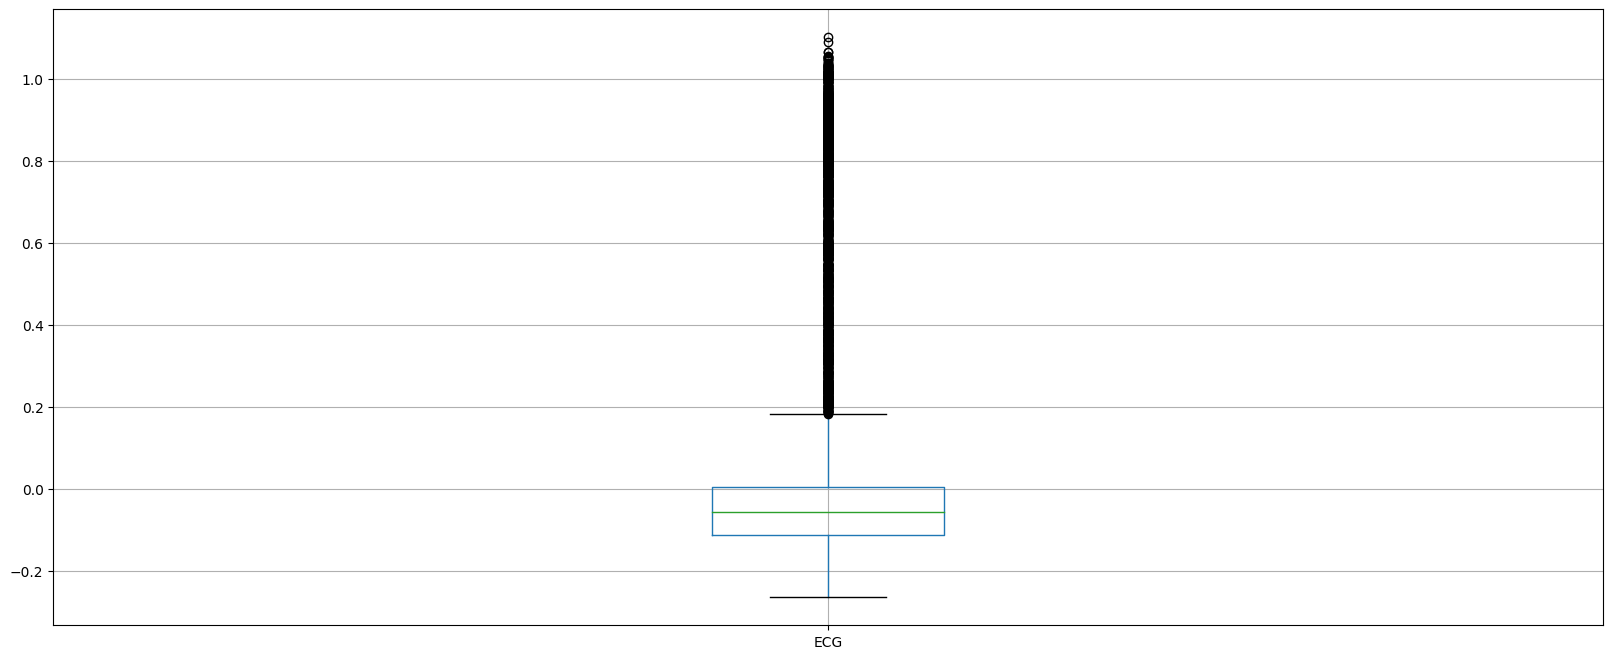

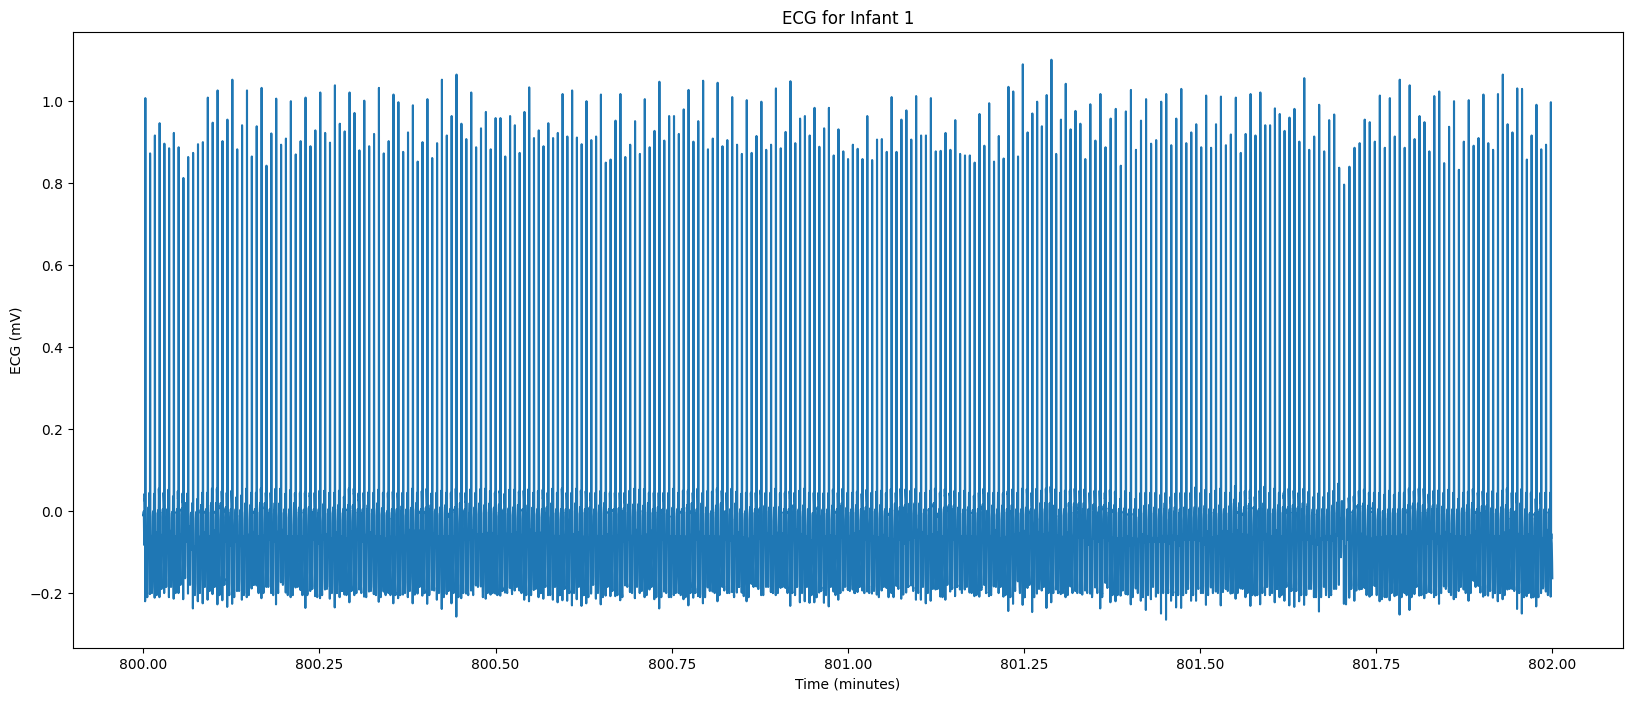

In [11]:
# Simple plot to see the data
fig1 = plt.figure(num=1,figsize=(20, 8))
dataframe_ECG.boxplot()
fig_2 = plt.figure(num=2, figsize=(20, 8))
plt.plot(time_minutes_ECG, signals_ECG[0])
plt.xlabel("Time (minutes)")
plt.ylabel("ECG (mV)")
plt.title("ECG for Infant 1")
plt.show()

# RESP Data - Plot and Visualize

In [12]:
# RESP data bin - make the data handling more convenient by splitting data into smaller bin
duration_RESP = 60000
kth_RESP = 400
# startNum_RESP = duration_RESP*kth_RESP
startNum_RESP = RESP_startNum
# endNum_RESP = duration_RESP*(kth_RESP+1)
endNum_RESP = RESP_endNum
signals_RESP = wfdb.rdsamp(f"{data_dir}/infant1_resp", sampfrom=startNum_RESP, sampto=endNum_RESP)
record_RESP = wfdb.rdrecord(f"{data_dir}/infant1_resp", sampfrom=startNum_RESP, sampto=endNum_RESP)
dataframe_RESP = record_RESP.to_dataframe()
annotation_RESP = wfdb.rdann(f"{data_dir}/infant1_resp", 'resp', sampfrom=startNum_RESP, sampto=endNum_RESP, shift_samps=True)
startTime_seconds_RESP = startNum_RESP/record_RESP.fs
endTime_seconds_RESP = endNum_RESP/record_RESP.fs
startTime_minutes_RESP = (startTime_seconds_RESP)/60
endTime_minutes_RESP = (endTime_seconds_RESP)/60
startTime_hours_RESP = startTime_minutes_RESP/60
endTime_hours_RESP = endTime_minutes_RESP/60

In [13]:
# EDA
print(signals_RESP[1])
print(signals_RESP[0].shape)
print(f"Start time: {startTime_seconds_RESP} seconds, End time: {endTime_seconds_RESP} seconds")
print(f"Start time: {startTime_minutes_RESP} minutes, End time: {endTime_minutes_RESP} minutes")
print(f"Start time: {startTime_hours_RESP} hours, End time: {endTime_hours_RESP} hours")
print(dataframe_RESP.describe())
q75_RESP, q25_RESP = np.percentile(signals_RESP[0], [75, 27])
q90_RESP, q10_RESP = np.percentile(signals_RESP[0], [90, 10])
q95_RESP, q5_RESP = np.percentile(signals_RESP[0], [95, 5])
print(f"25th percentile: {q25_RESP}, 75th percentile: {q75_RESP}")
print(f"10th percentile: {q10_RESP}, 90th percentile: {q90_RESP}")
print(f"5th percentile: {q5_RESP}, 95th percentile: {q95_RESP}")

{'fs': 500, 'sig_len': 60000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
(60000, 1)
Start time: 48000.0 seconds, End time: 48120.0 seconds
Start time: 800.0 minutes, End time: 802.0 minutes
Start time: 13.333333333333334 hours, End time: 13.366666666666667 hours
               RESP
count  60000.000000
mean      24.230342
std        0.372653
min       23.461751
25%       23.935447
50%       24.175652
75%       24.508358
max       26.306910
25th percentile: 23.938430565459445, 75th percentile: 24.508357675213606
10th percentile: 23.797440743805602, 90th percentile: 24.742594733410996
5th percentile: 23.747460225018262, 95th percentile: 24.841063815200982


In [14]:
# Generate Timestamp array
start = startTime_seconds_RESP
stop = endTime_seconds_RESP
step = 1/record_RESP.fs
time_seconds_RESP = np.arange(start=start, stop=stop, step=step)
time_minutes_RESP = time_seconds_RESP/60
time_minutes_RESP


array([800.        , 800.00003333, 800.00006667, ..., 801.9999    ,
       801.99993333, 801.99996667])

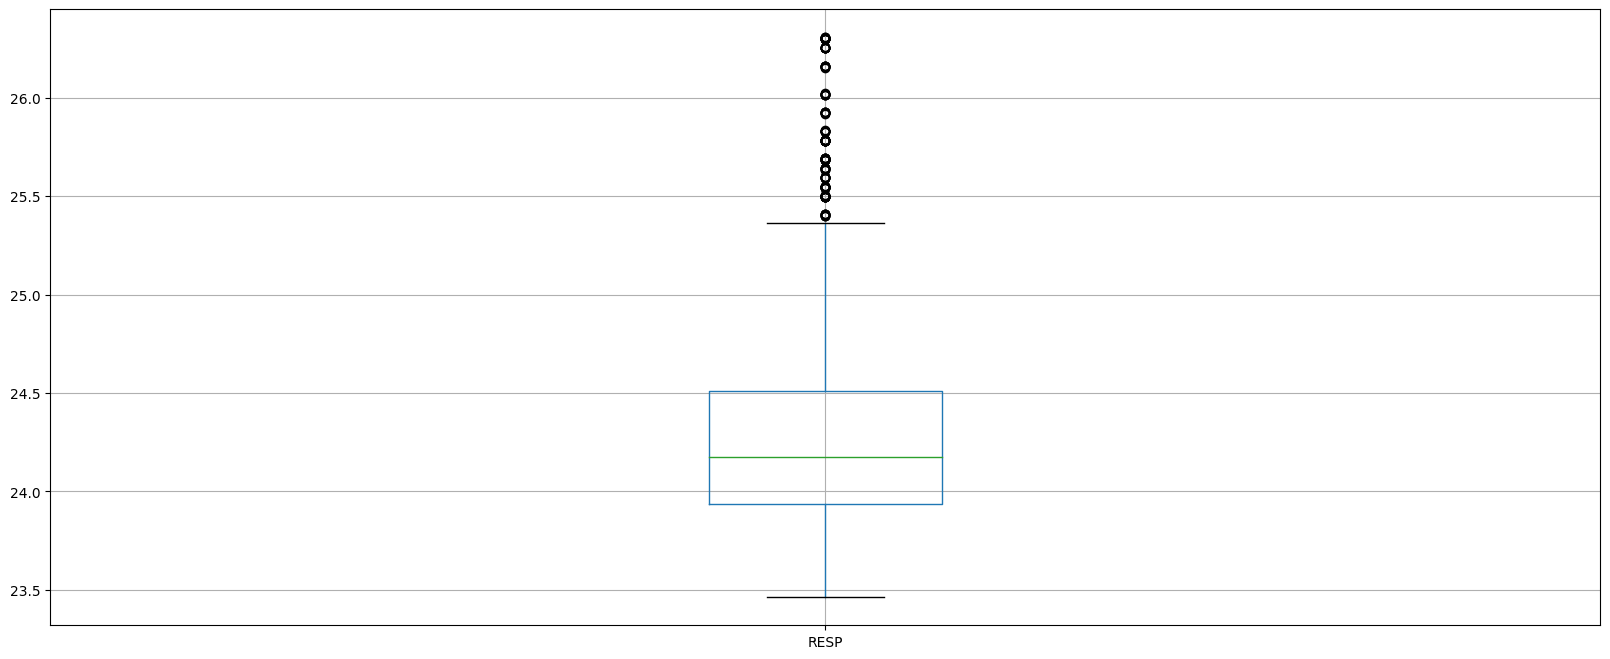

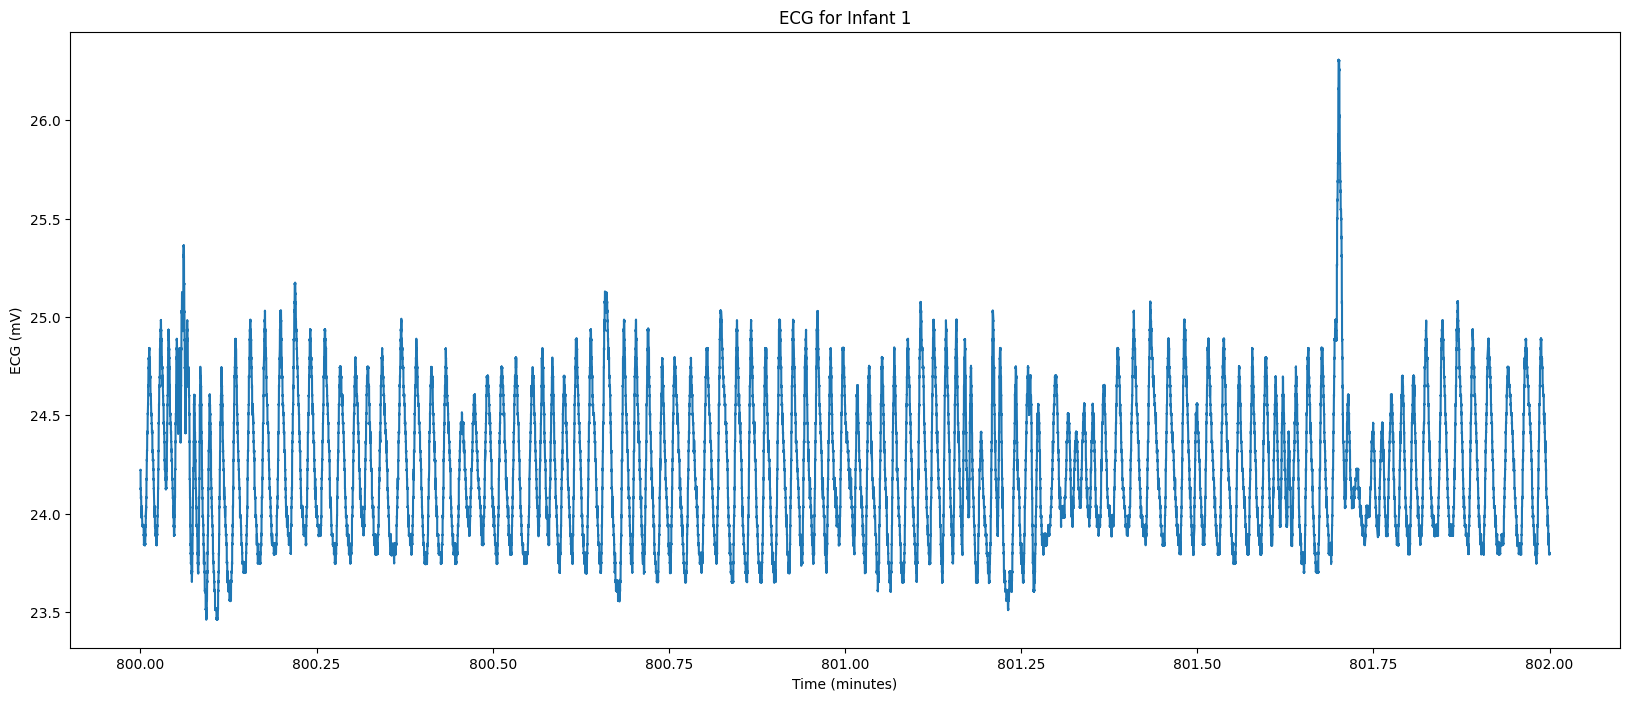

In [15]:
# Simple plot to see the data
fig_101 = plt.figure(num=101,figsize=(20, 8))
dataframe_RESP.boxplot()
fig_102 = plt.figure(num=102, figsize=(20, 8))
plt.plot(time_minutes_RESP, signals_RESP[0])
plt.xlabel("Time (minutes)")
plt.ylabel("ECG (mV)")
plt.title("ECG for Infant 1")
plt.show()

### Fast Fourier Transform

In [16]:
signals_ECG_reshaped = signals_ECG[0].reshape(signals_ECG[0].shape[0])
signals_RESP_reshaped = signals_RESP[0].reshape(signals_RESP[0].shape[0])
signals_ECG_reshaped.reshape(signals_ECG[0].shape)
signals_ECG_reshaped

array([-0.00999176, -0.00999176, -0.00749382, ..., -0.14737847,
       -0.15737023, -0.16361508])

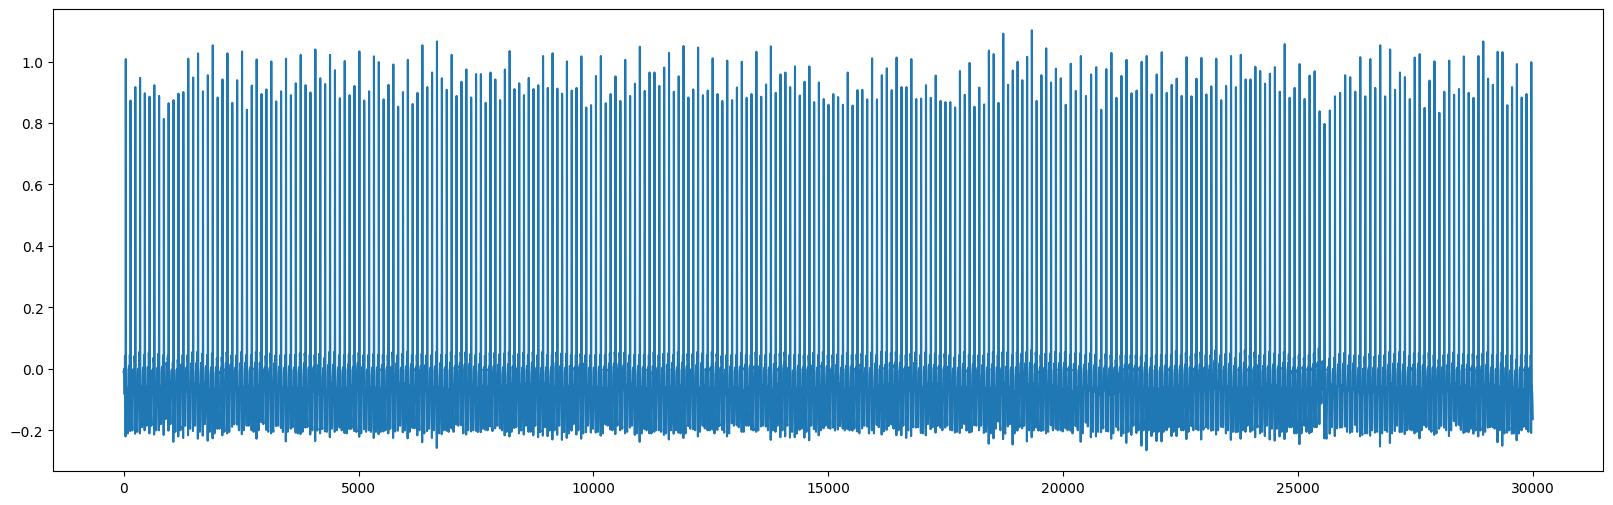

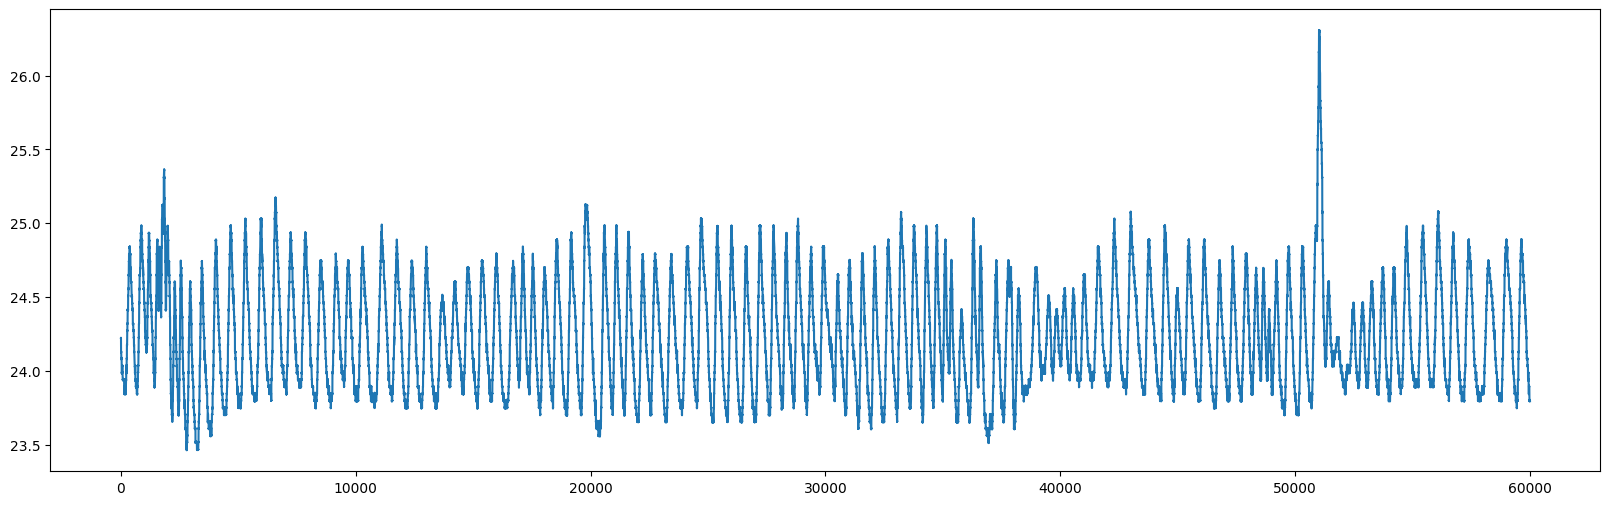

In [17]:
fig_501 = plt.figure(num=501, figsize=(20,6))
plt.plot(signals_ECG_reshaped)
fig_502 = plt.figure(num=502, figsize=(20,6))
plt.plot(signals_RESP_reshaped)
plt.show()

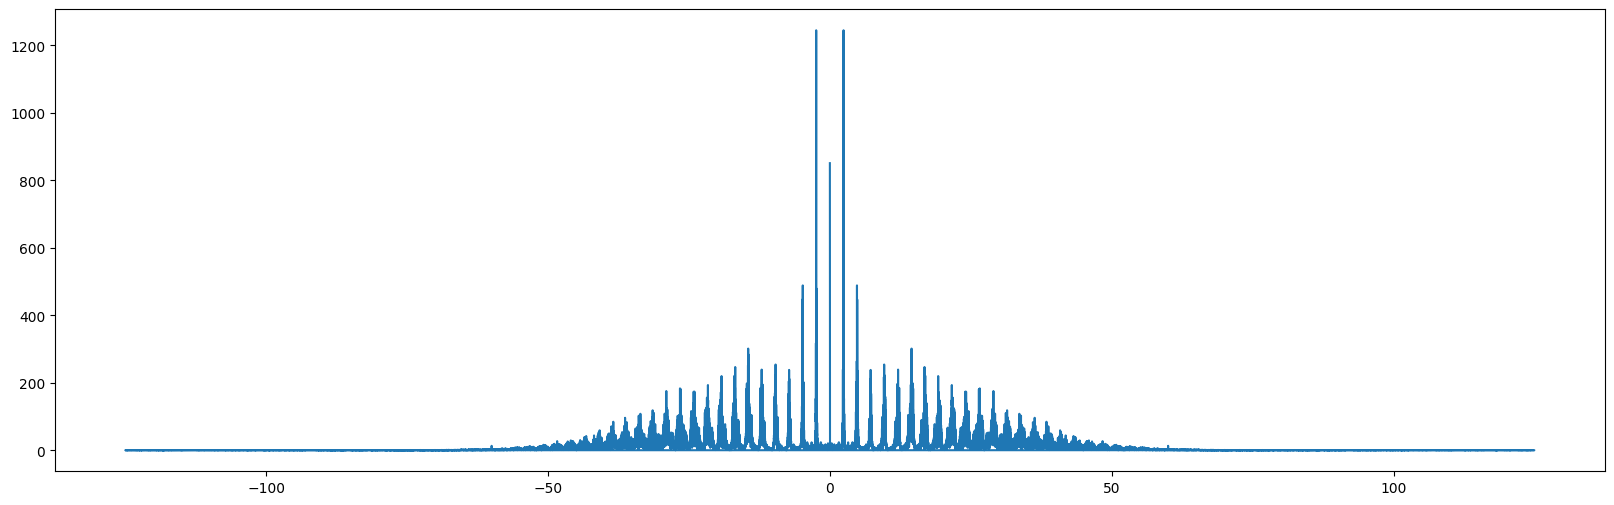

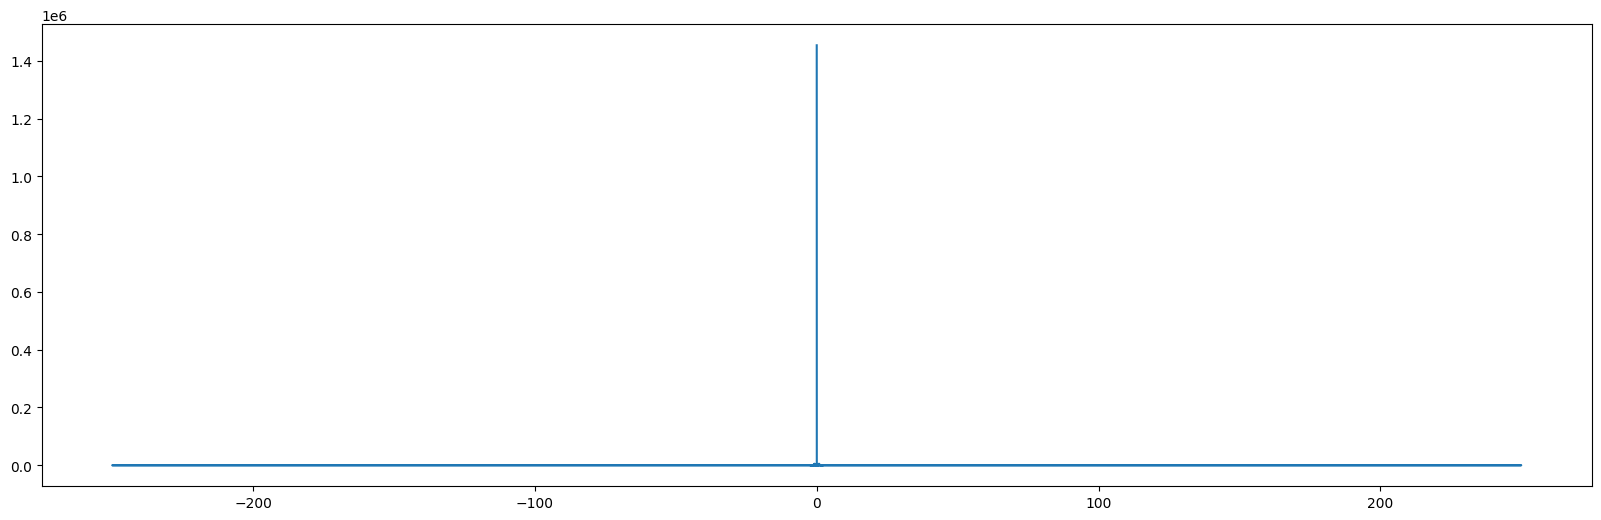

In [18]:
ECG_yf = scipy.fft.fft(signals_ECG_reshaped)
ECG_xf = scipy.fft.fftfreq(duration_ECG, 1 / record_ECG.fs)
RESP_yf = scipy.fft.fft(signals_RESP_reshaped)
RESP_xf = scipy.fft.fftfreq(duration_RESP, 1 / record_RESP.fs)
# print(duration_ECG)
# print(ECG_yf.shape)
# print(ECG_xf.shape)
fig_503 = plt.figure(num=503, figsize=(20,6))
plt.plot(ECG_xf, np.abs(ECG_yf))
fig_504 = plt.figure(num=504, figsize=(20,6))
plt.plot(RESP_xf, np.abs(RESP_yf))
plt.show()

[ 7.26910269e+05  -0.j          3.20623055e+02+112.23635574j
  3.75837255e+01+274.62392712j ... -3.35840456e+01+174.22140962j
  3.75837255e+01-274.62392712j  3.20623055e+02-112.23635574j]


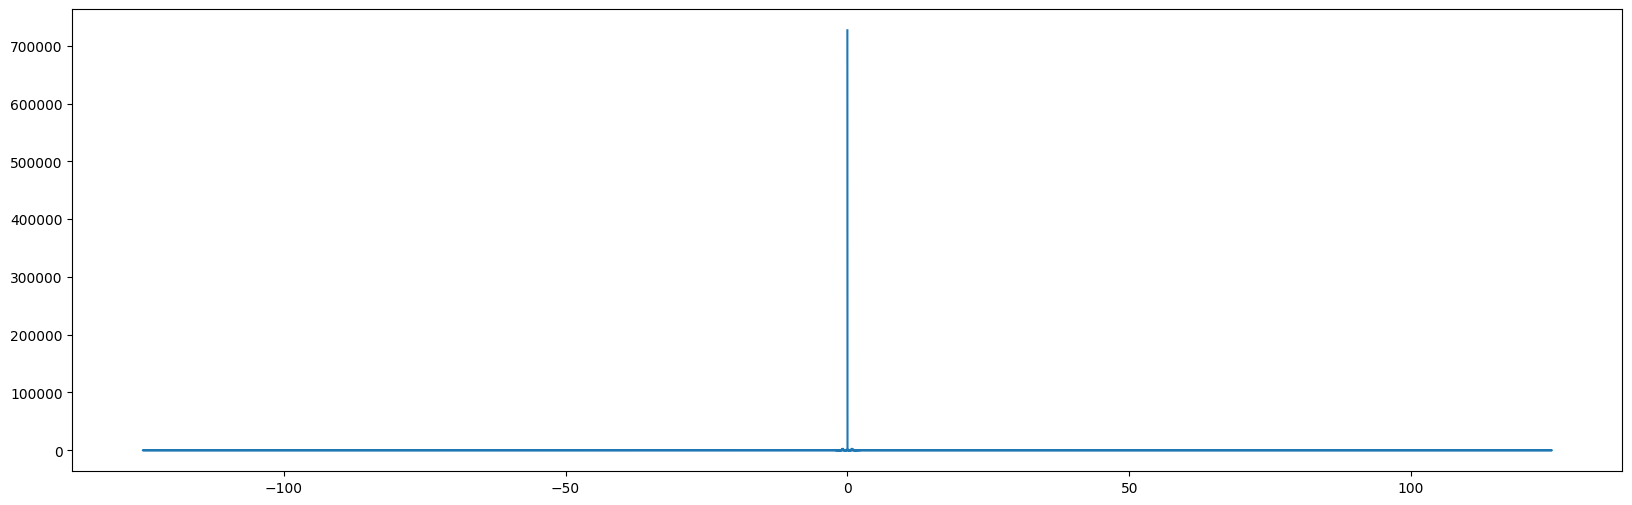

In [19]:
signals_RESP_reshaped_250 = scipy.signal.resample(signals_RESP_reshaped, signals_ECG_reshaped.shape[0])
RESP_250_yf = scipy.fft.fft(signals_RESP_reshaped_250)
RESP_250_xf = scipy.fft.fftfreq(RESP_250_yf.shape[0], 1 / 250)
print(RESP_250_yf)
fig_505 = plt.figure(num=505, figsize=(20,6))
plt.plot(RESP_250_xf,np.abs(RESP_250_yf))
plt.show()

# Correlation Test

In [20]:
print(record_ECG.fs)
print(record_RESP.fs)

250
500


In [21]:
# Resample RESP data to same cardinality as ECG
signals_RESP_reshaped_250 = scipy.signal.resample(signals_RESP_reshaped, signals_ECG_reshaped.shape[0])
signals_RESP_reshaped_250.shape

(30000,)

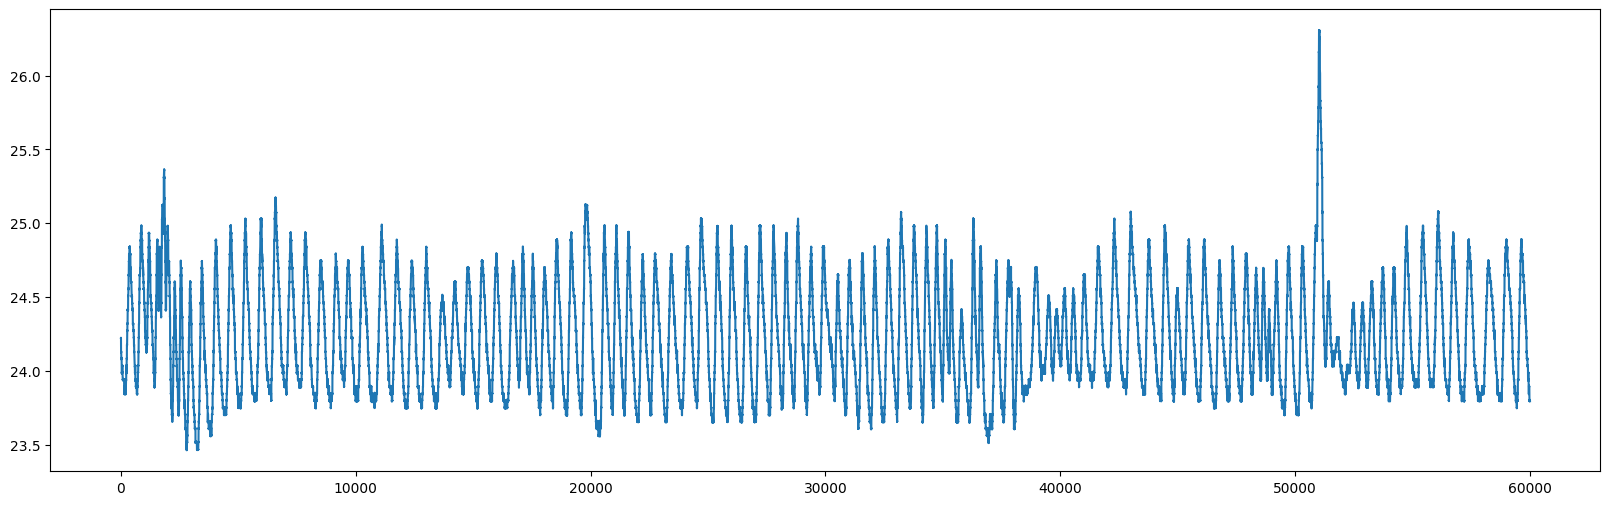

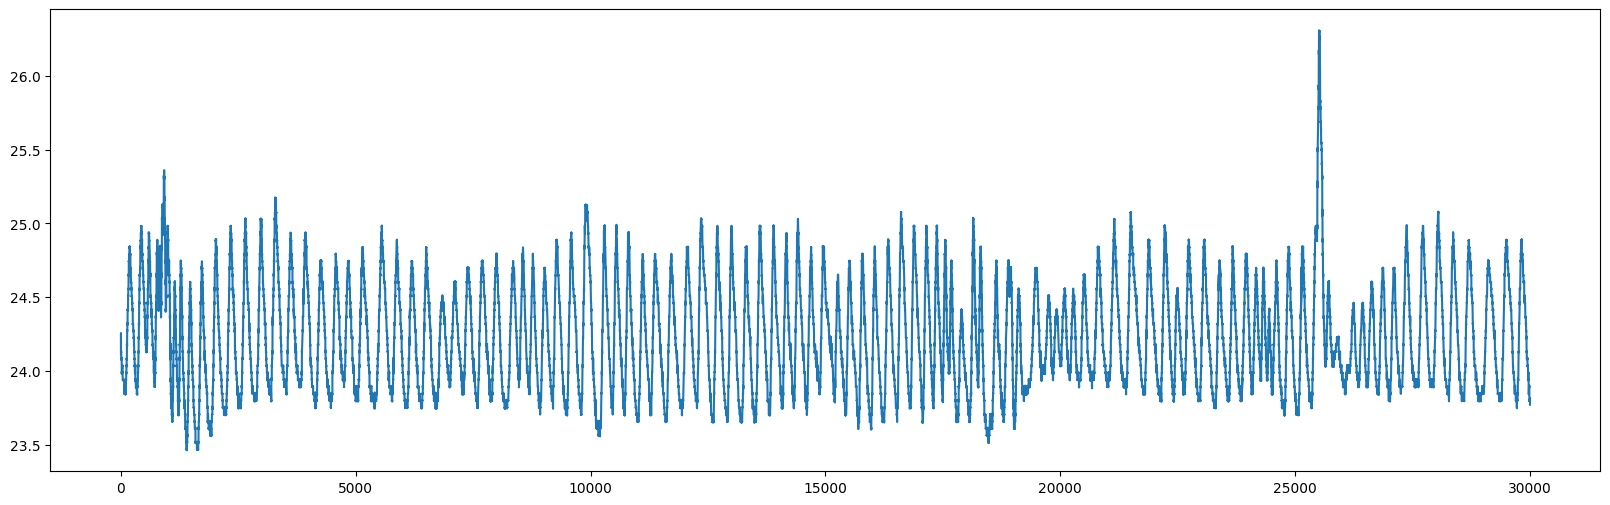

In [22]:
# Direct plot of Time based data ECG vs RESP
fig_601 = plt.figure(num=601, figsize=(20,6))
plt.plot(signals_RESP_reshaped)
fig_602 = plt.figure(num=602, figsize=(20,6))
plt.plot(signals_RESP_reshaped_250)
plt.show()

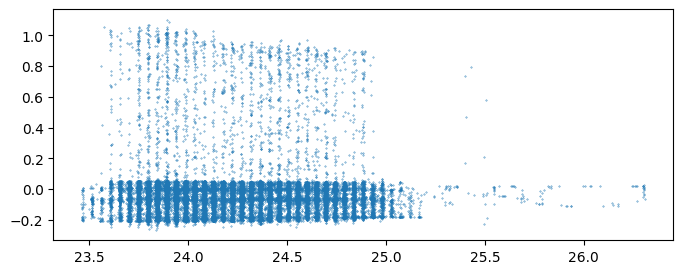

In [23]:
fig_603 = plt.figure(num=603, figsize=(8,3))
plt.scatter(signals_RESP_reshaped_250, signals_ECG_reshaped, s=0.1)
plt.show()

In [24]:
# Covariance
covariance = np.cov(signals_RESP_reshaped_250, signals_ECG_reshaped)
print(covariance)
# calculate Pearson's correlation - 0 is no correlation -1 or 1 is highly correlated
corr, _ = scipy.stats.pearsonr(signals_RESP_reshaped_250, signals_ECG_reshaped)
print('Pearsons correlation: %.3f' % corr)
# calculate spearman's correlation - 0 is no correlation -1 or 1 is highly correlated
corr, _ = scipy.stats.spearmanr(signals_RESP_reshaped_250, signals_ECG_reshaped)
print('Spearmans correlation: %.3f' % corr)

[[ 0.13881502 -0.00068928]
 [-0.00068928  0.03277231]]
Pearsons correlation: -0.010
Spearmans correlation: -0.008


## Checkpoint: Analysis
1. No correlation at all for ECG and RESP time-based data
2. the frequency based data for ECG seems fine but RESP looks off. This might due to the data not normalized or standardized

# Massaging the Data
1. Normalization
2. Smoothing the Data - remove outlier
    - moving average
    - rolling median
    - interquartile
3. bandpass

[How to use Data Scaling Improve Deep Learning Model Stability and Performance](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
signals_ECG_normalized = scaler.fit_transform(signals_ECG[0])
signals_RESP_normalized = scaler.fit_transform(signals_RESP[0])


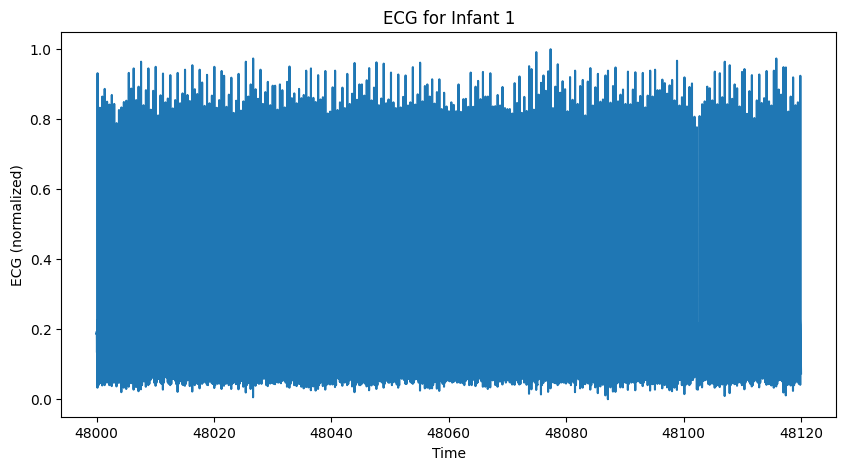

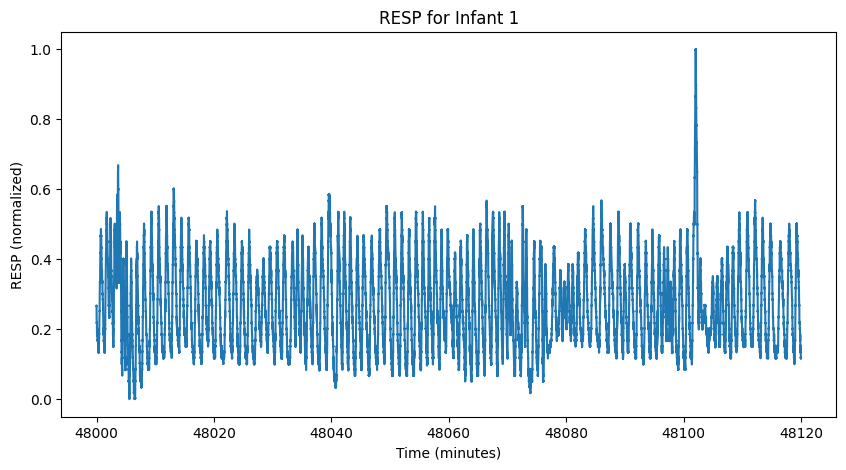

In [26]:
fig_701 = plt.figure(num=701, figsize=(10,5))
plt.plot(time_seconds_ECG, signals_ECG_normalized)
plt.xlabel("Time")
plt.ylabel("ECG (normalized)")
plt.title("ECG for Infant 1")
fig_702 = plt.figure(num=702, figsize=(10,5))
plt.plot(time_seconds_RESP, signals_RESP_normalized)
plt.xlabel("Time (minutes)")
plt.ylabel("RESP (normalized)")
plt.title("RESP for Infant 1")
plt.show()

### Rolling Mean

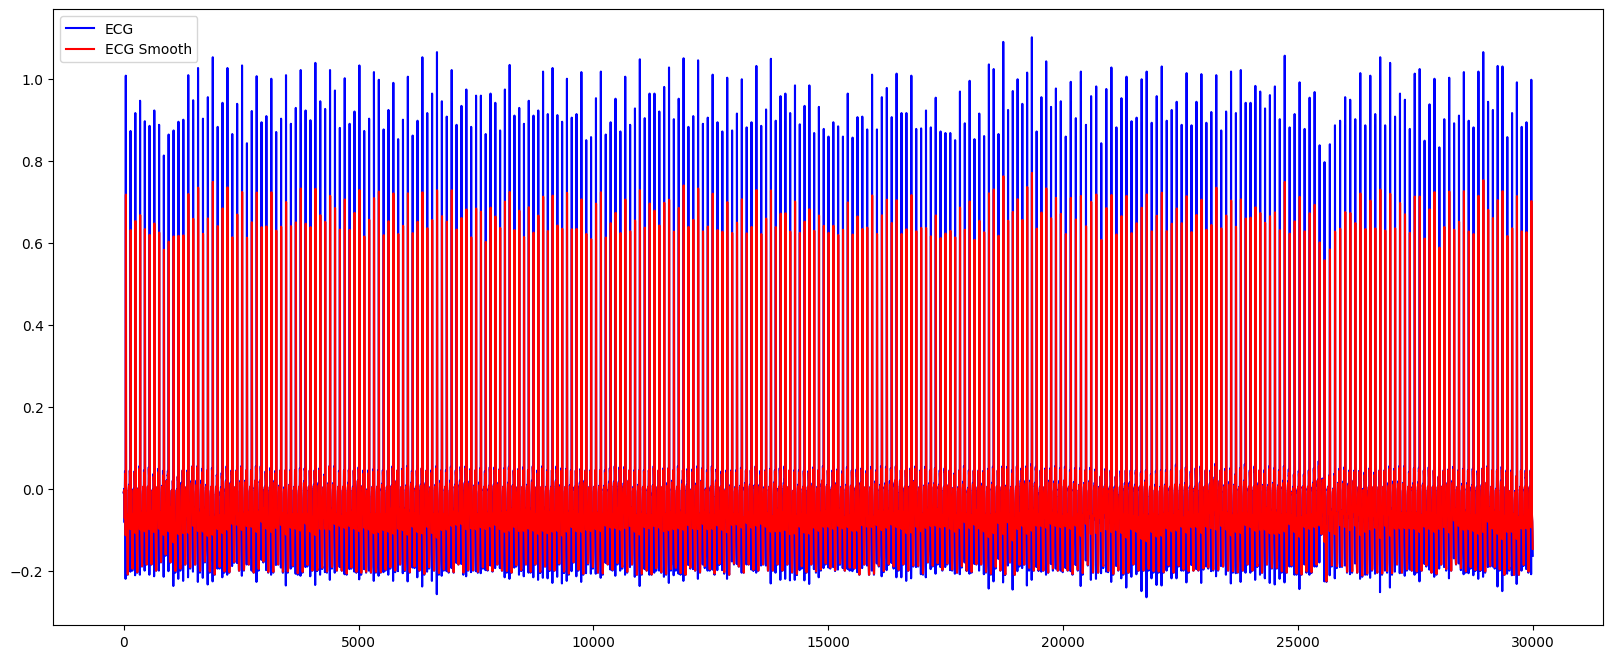

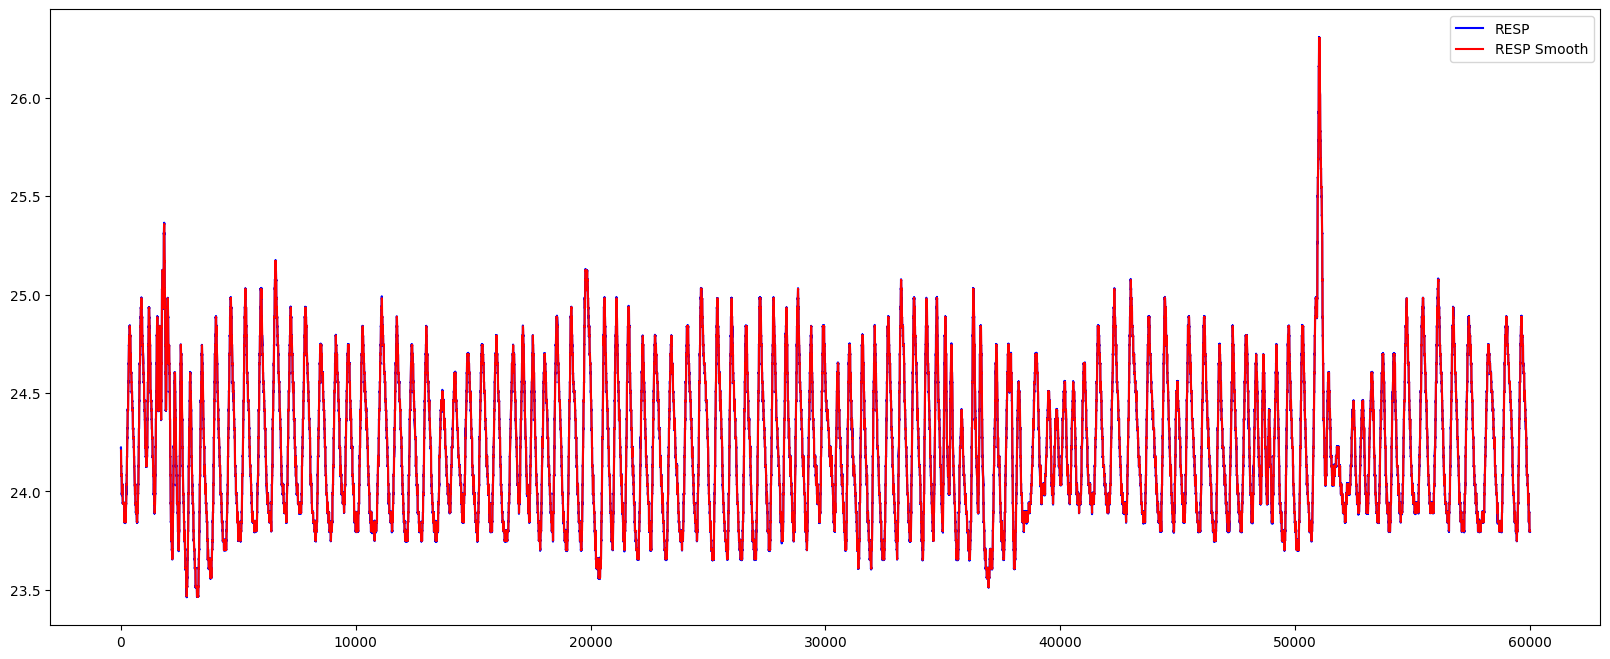

In [27]:
# ECG DATA
signals_ECG_dataframe = pd.DataFrame(signals_ECG[0])
rolling_ECG = signals_ECG_dataframe.rolling(window=5)
signals_ECG_dataframe_mean = rolling_ECG.mean()
# plot
ax = signals_ECG_dataframe.plot(color='blue')
signals_ECG_dataframe_mean.plot(ax=ax, color='red', figsize=(20,8))
plt.legend(['ECG','ECG Smooth'])

# RESP DATA
signals_RESP_dataframe = pd.DataFrame(signals_RESP[0])
rolling_RESP = signals_RESP_dataframe.rolling(window=5)
signals_RESP_dataframe_mean = rolling_RESP.mean()
# plot
ax = signals_RESP_dataframe.plot(color='blue')
signals_RESP_dataframe_mean.plot(ax=ax, color='red', figsize=(20,8))
plt.legend(['RESP','RESP Smooth'])

### Rolling Median

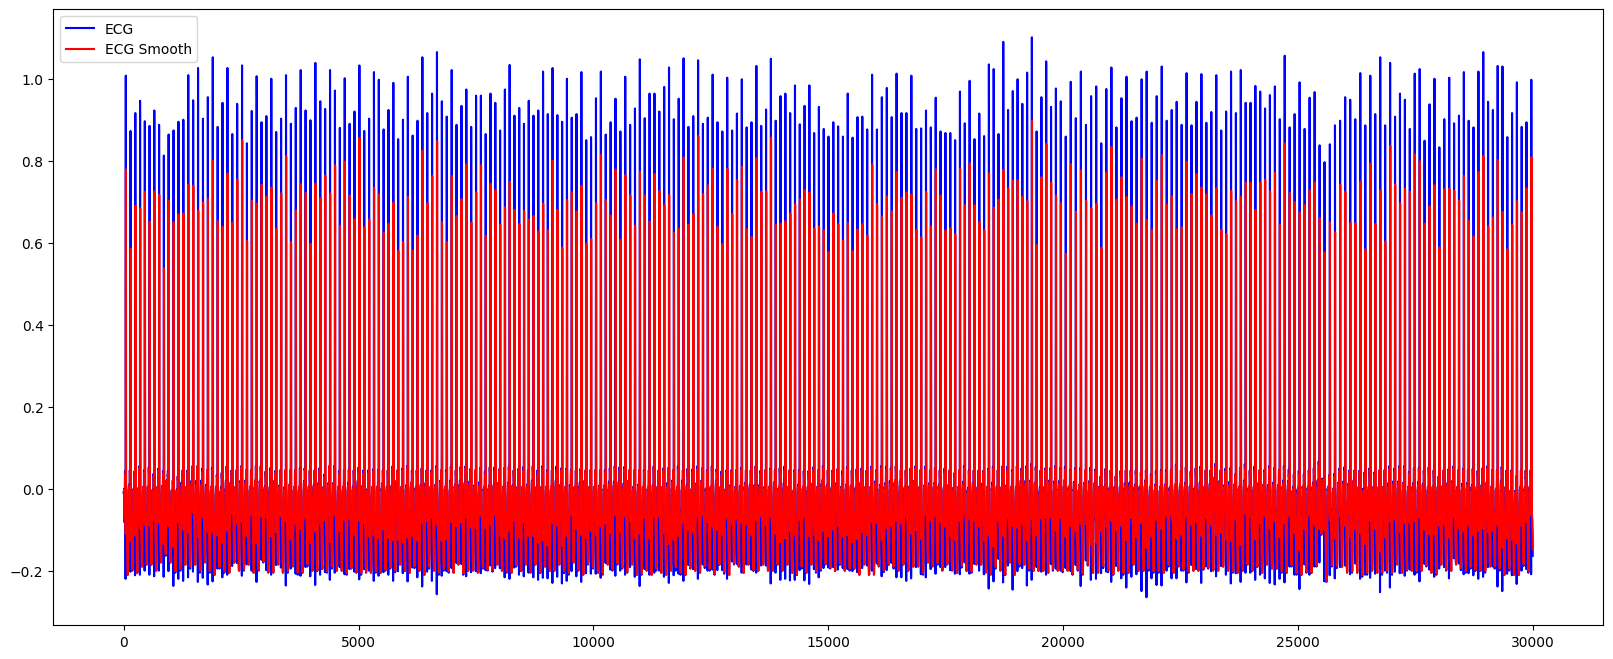

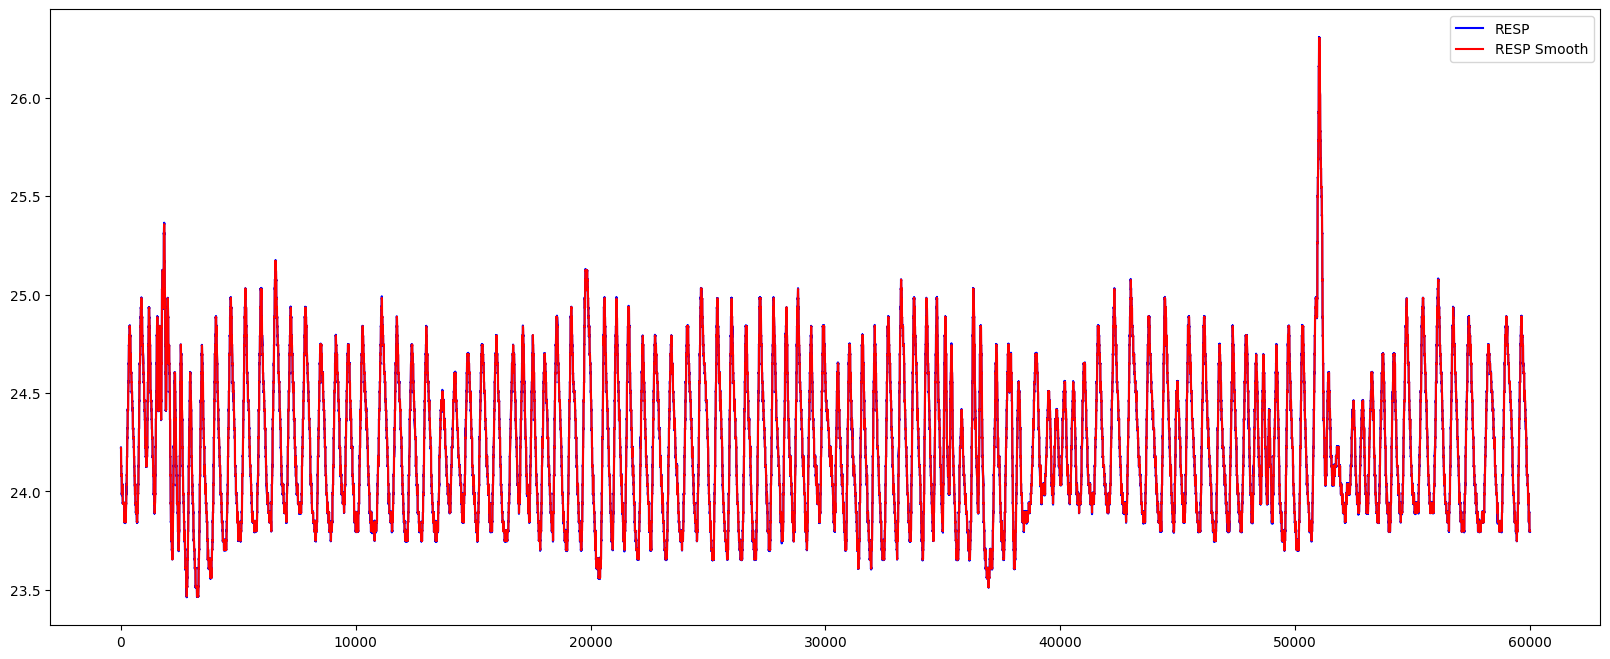

In [28]:
# ECG DATA
signals_ECG_dataframe = pd.DataFrame(signals_ECG[0])
rolling_ECG = signals_ECG_dataframe.rolling(window=5)
signals_ECG_dataframe_mean = rolling_ECG.median()
# plot
ax = signals_ECG_dataframe.plot(color='blue')
signals_ECG_dataframe_mean.plot(ax=ax, color='red', figsize=(20,8))
plt.legend(['ECG','ECG Smooth'])

# RESP DATA
signals_RESP_dataframe = pd.DataFrame(signals_RESP[0])
rolling_RESP = signals_RESP_dataframe.rolling(window=5)
signals_RESP_dataframe_mean = rolling_RESP.median()
# plot
ax = signals_RESP_dataframe.plot(color='blue')
signals_RESP_dataframe_mean.plot(ax=ax, color='red', figsize=(20,8))
plt.legend(['RESP','RESP Smooth'])

In [29]:
iqr1_ECG = q75_ECG-q25_ECG
iqr2_ECG = q90_ECG-q10_ECG
iqr3_ECG = q95_ECG-q5_ECG
decimal_ECG = 3
print(f"ECG")
print(f"Percentiles: 25th={q25_ECG:.{decimal_ECG}f}, 75th={q75_ECG:.{decimal_ECG}f}, IQR={iqr1_ECG:.{decimal_ECG}f}")
print(f"Percentiles: 10th={q10_ECG:.{decimal_ECG}f}, 90th={q90_ECG:.{decimal_ECG}f}, IQR={iqr2_ECG:.{decimal_ECG}f}")
print(f"Percentiles: 5th={q5_ECG:.{decimal_ECG}f}, 95th={q95_ECG:.{decimal_ECG}f}, IQR={iqr3_ECG:.{decimal_ECG}f}")
print("--------------------------------")
iqr1_RESP = q75_RESP-q25_RESP
iqr2_RESP = q90_RESP-q10_RESP
iqr3_RESP = q95_RESP-q5_RESP
decimal_RESP = 3
print(f"RESP")
print(f"Percentiles: 25th={q25_RESP:.{decimal_RESP}f}, 75th={q75_RESP:.{decimal_RESP}f}, IQR={iqr1_RESP:.{decimal_RESP}f}")
print(f"Percentiles: 10th={q10_RESP:.{decimal_RESP}f}, 90th={q90_RESP:.{decimal_RESP}f}, IQR={iqr2_RESP:.{decimal_RESP}f}")
print(f"Percentiles: 5th={q5_RESP:.{decimal_RESP}f}, 95th={q95_RESP:.{decimal_RESP}f}, IQR={iqr3_RESP:.{decimal_RESP}f}")

ECG
Percentiles: 25th=-0.104, 75th=0.005, IQR=0.109
Percentiles: 10th=-0.185, 90th=0.041, IQR=0.226
Percentiles: 5th=-0.197, 95th=0.200, IQR=0.397
--------------------------------
RESP
Percentiles: 25th=23.938, 75th=24.508, IQR=0.570
Percentiles: 10th=23.797, 90th=24.743, IQR=0.945
Percentiles: 5th=23.747, 95th=24.841, IQR=1.094


ECG DATA
Identified outliers: 547
[-0.00999176 -0.00999176 -0.00749382 ... -0.14737847 -0.15737023
 -0.16361508]
RESP DATA
Identified outliers: 547
[24.22264814 24.2241401  24.22115619 ... 23.80042466 23.7989327
 23.79445683]


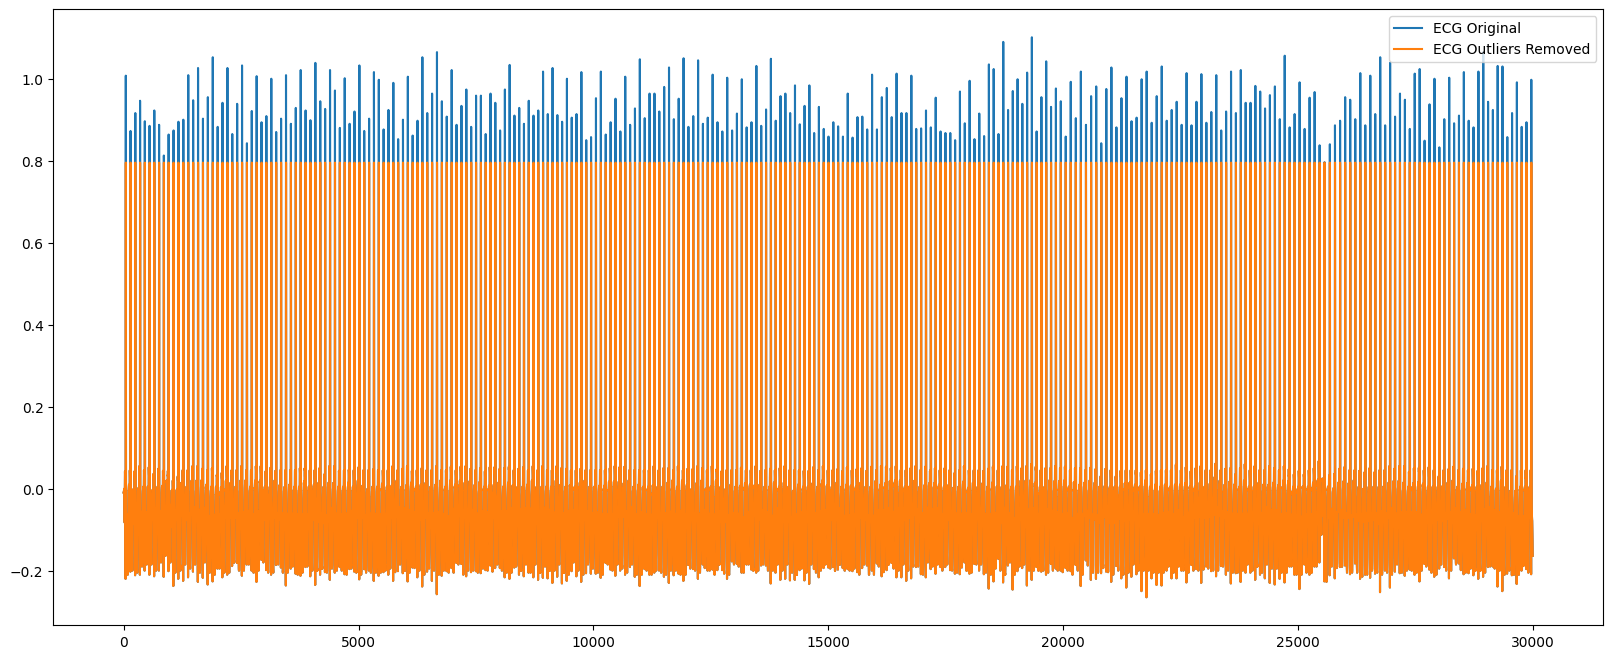

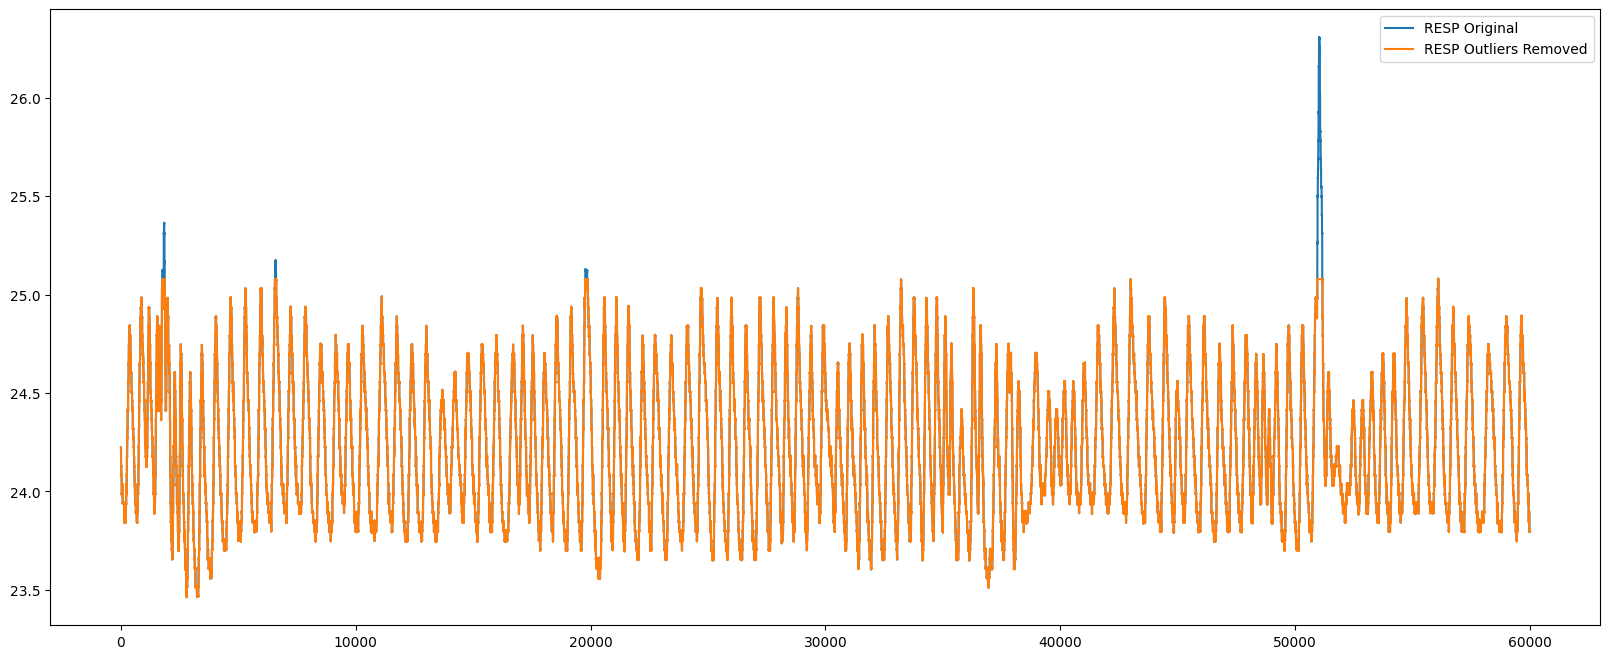

In [48]:
import functools
# function if more than upper assign upper, less than lower assign lower, else same
def iqr_remove_outlier(x, lower, upper):
    if (x < lower):
        return lower
    elif (x > upper): 
        return upper
    else:
        return x

# calculate the outlier cutoff
print("ECG DATA")
cut_off_ECG = iqr3_ECG * 1.5
lower_ECG, upper_ECG = q5_ECG - cut_off_ECG, q95_ECG + cut_off_ECG
# identify outliers
signals_ECG_outliers = [x for x in signals_ECG[0] if x < lower_ECG or x > upper_ECG]
print('Identified outliers: %d' % len(signals_ECG_outliers))
signals_ECG_outliers_removed =[]
signals_ECG_outliers_removed = map(functools.partial(iqr_remove_outlier, lower=lower_ECG, upper=upper_ECG), signals_ECG[0])
print(signals_ECG_outliers_removed)
signals_ECG_outliers_removed_np = np.fromiter(signals_ECG_outliers_removed, dtype=np.float64)
print(signals_ECG_outliers_removed_np)
print("RESP DATA")
cut_off_RESP = iqr1_RESP * 1
lower_RESP, upper_RESP = q25_RESP - cut_off_RESP, q75_RESP + cut_off_RESP
# identify outliers
signals_RESP_outliers = [x for x in signals_RESP[0] if x < lower_RESP or x > upper_RESP]
print('Identified outliers: %d' % len(signals_ECG_outliers))
signals_RESP_outliers_removed =[]
signals_RESP_outliers_removed = map(functools.partial(iqr_remove_outlier, lower=lower_RESP, upper=upper_RESP), signals_RESP[0])
print(signals_RESP_outliers_removed)
signals_RESP_outliers_removed_np = np.fromiter(signals_RESP_outliers_removed, dtype=np.float64)
print(signals_RESP_outliers_removed_np)


fig_703 = plt.figure(num=703, figsize=(20, 8))
plt.plot(signals_ECG[0], label='ECG Original')
plt.plot(signals_ECG_outliers_removed_np, label='ECG Outliers Removed')
plt.legend()
plt.show()

fig_704 = plt.figure(num=704, figsize=(20, 8))
plt.plot(signals_RESP[0], label='RESP Original')
plt.plot(signals_RESP_outliers_removed_np, label='RESP Outliers Removed')
plt.legend()
plt.show()

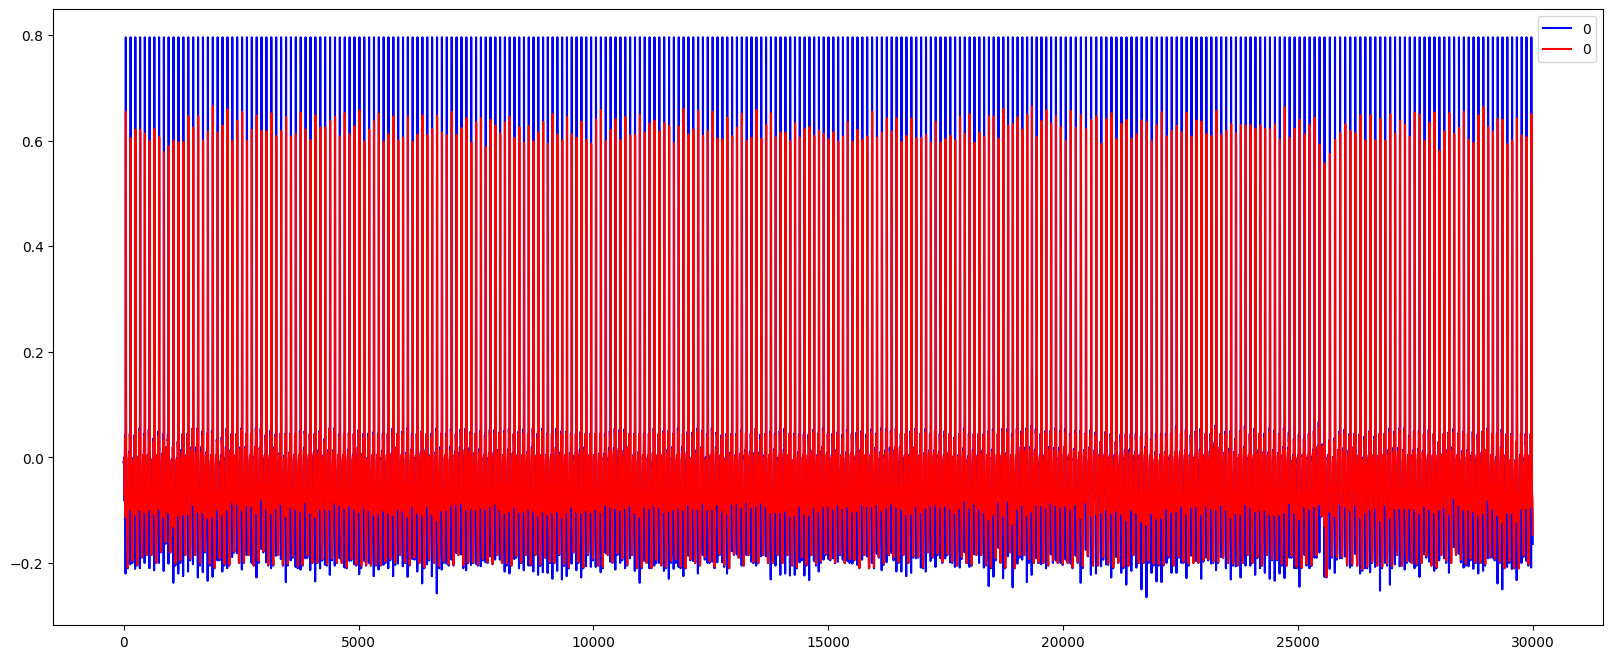

In [37]:
# Smooth the data 
signals_ECG_outliers_removed_np_df = pd.DataFrame(signals_ECG_outliers_removed_np)
signals_ECG_outliers_removed_np_df_Rmean = signals_ECG_outliers_removed_np_df.rolling(window=5).mean()
ax = signals_ECG_outliers_removed_np_df.plot(color='blue')
signals_ECG_outliers_removed_np_df_Rmean.plot(ax=ax, color='red', figsize=(20,8))
signals_ECG_outliers_removed_np_1 = signals_ECG_outliers_removed_np_df_Rmean.to_numpy()

In [39]:
signals_ECG_outliers_removed_np = signals_ECG_outliers_removed_np.reshape((len(signals_ECG_outliers_removed_np),1))
signals_RESP_outliers_removed_np = signals_RESP_outliers_removed_np.reshape((len(signals_RESP_outliers_removed_np),1))
signals_ECG_outliers_removed_np_normalized = scaler.fit_transform(signals_ECG_outliers_removed_np)
signals_RESP_outliers_removed_np_normalized = scaler.fit_transform(signals_RESP_outliers_removed_np)

signals_ECG_outliers_removed_np_1 = signals_ECG_outliers_removed_np_1.reshape((len(signals_ECG_outliers_removed_np_1),1))
signals_ECG_outliers_removed_np_1_normalized = scaler.fit_transform(signals_ECG_outliers_removed_np_1)

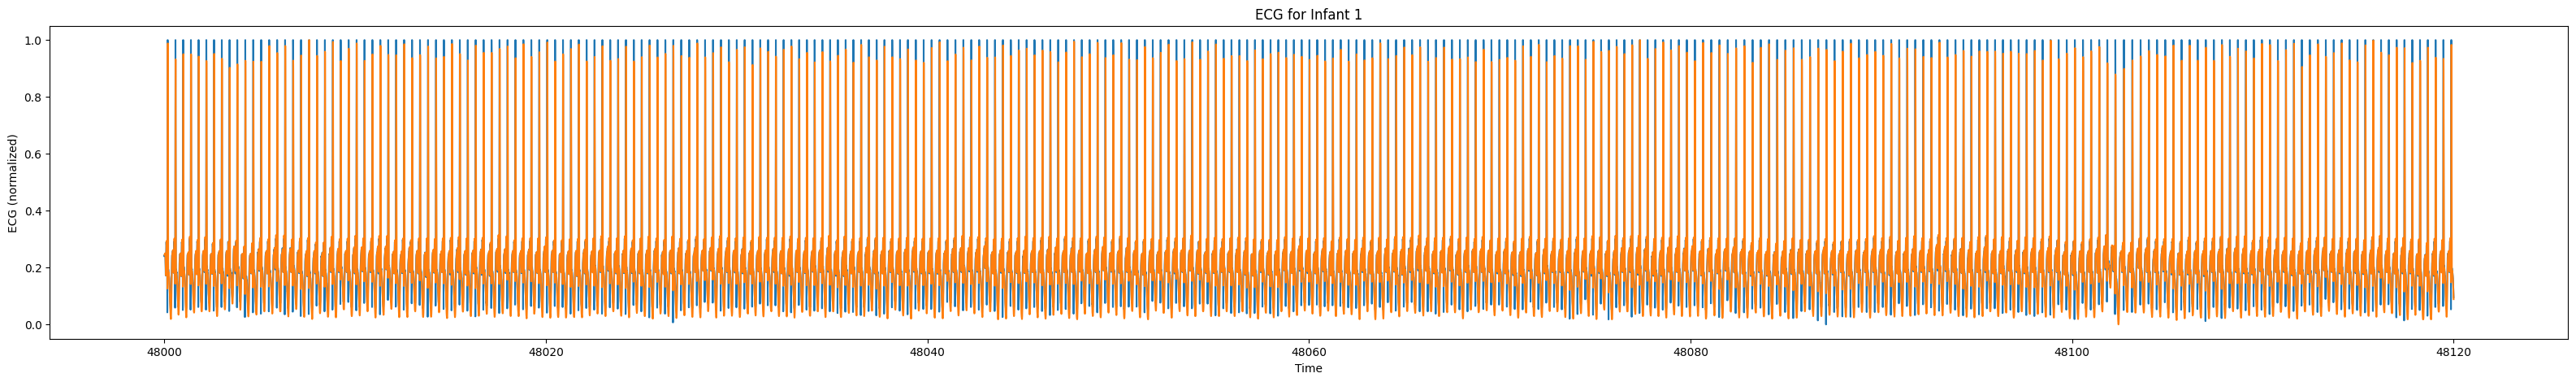

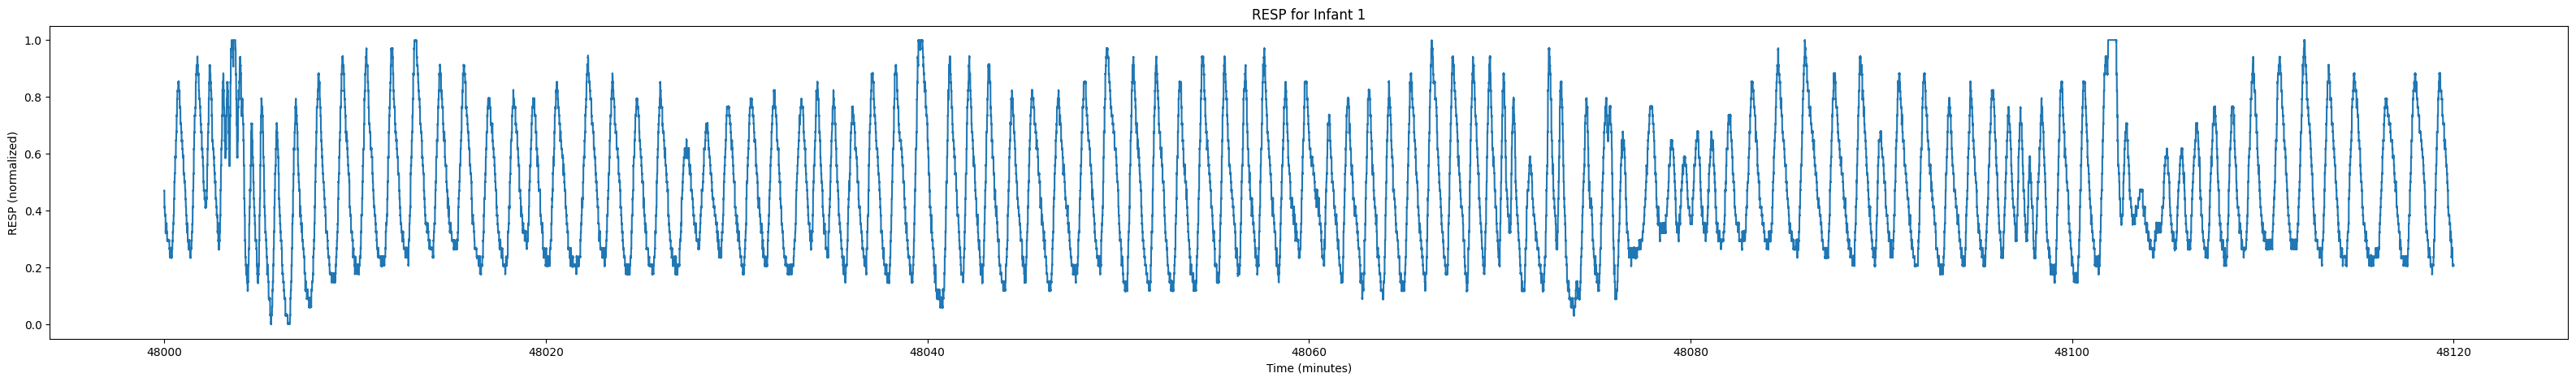

In [45]:
# slice of data

fig_705 = plt.figure(num=705, figsize=(40,5))
plt.plot(time_seconds_ECG[:], signals_ECG_outliers_removed_np_normalized[:], label='non smooth')
plt.plot(time_seconds_ECG[:], signals_ECG_outliers_removed_np_1_normalized[:], label='smooth')
plt.xlabel("Time")
plt.ylabel("ECG (normalized)")
plt.title("ECG for Infant 1")
fig_706 = plt.figure(num=706, figsize=(40,5))
plt.plot(time_seconds_RESP[:], signals_RESP_outliers_removed_np_normalized[:])
plt.xlabel("Time (minutes)")
plt.ylabel("RESP (normalized)")
plt.title("RESP for Infant 1")
plt.show()

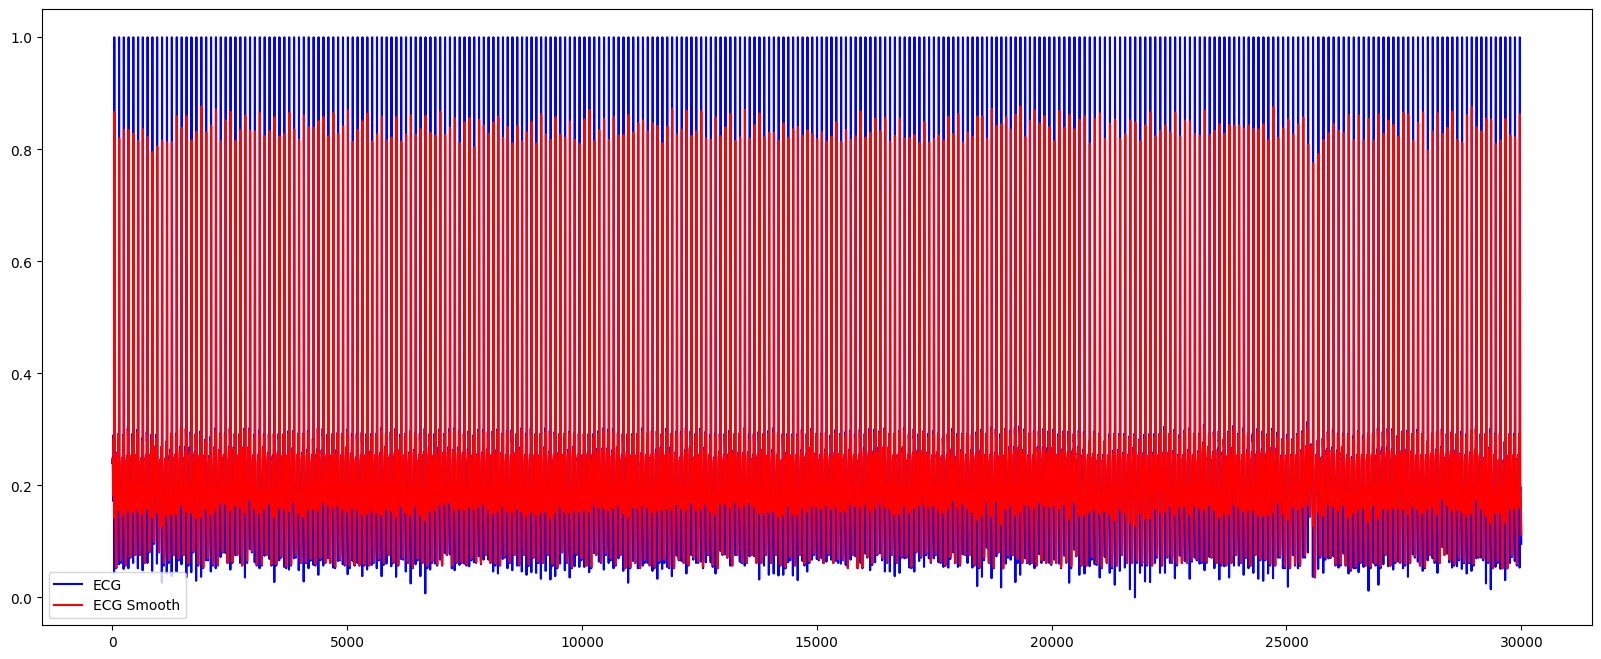

In [ ]:
signals_ECG_outliers_removed_np_normalized_df = pd.DataFrame(signals_ECG_outliers_removed_np_normalized)
signals_ECG_outliers_removed_np_normalized_df_Rmean = signals_ECG_outliers_removed_np_normalized_df.rolling(window=5).mean()
signals_RESP_outliers_removed_np_normalized_Rmean = pd.DataFrame(signals_RESP_outliers_removed_np_normalized).rolling(window=5).mean()
# plot
ax = signals_ECG_outliers_removed_np_normalized_df.plot(color='blue')
signals_ECG_outliers_removed_np_normalized_df_Rmean.plot(ax=ax, color='red', figsize=(20,8))
plt.legend(['ECG','ECG Smooth'])
# should smooth the data first before normalize

correlation test:
1. between ECG & RESP
2. Between ECG (freq) & RESP (freq)
3. between Heartrate & RESP
4. between Heartrate & RESP (freq)
5. SVR 